In [50]:
import numpy as np
import matplotlib.pyplot as plt 
import os
import cv2

In [90]:
class_dict_BTCV = {
        0:(0, 0, 0),
        1:(255, 60, 0),
        2:(255, 60, 232),
        3:(134, 79, 117),
        4:(125, 0, 190),
        5:(117, 200, 191),
        6:(230, 91, 101),
        7:(255, 0, 155),
        8:(75, 205, 155),
        9:(100, 37, 200)
}

class_dict = {
    "background":0,
    "aorta":1,
    "kidney_left":2,
    "liver":3,
    "postcava":4,
    "stomach":5,
    "gall_bladder":6,
    "kidney_right":7,
    "pancreas":8,
    "spleen":9
}

class_dict_ACDC = {
        0:(0, 0, 0),
        1:(230, 91, 101),
        2:(255, 0, 155),
        3:(117, 200, 91),
}

def onehot_to_rgb(onehot, color_dict=class_dict_BTCV):
    onehot = np.int64(onehot)
    output = np.zeros(onehot.shape[:2]+(3,))
    for k in color_dict.keys():
        output[onehot==k] = color_dict[k]
    return np.uint8(output)

In [4]:
img_path = "/data2/onkar/altasSlices/images/"
label_path = "/data2/onkar/altasSlices/labels/"

In [80]:
img_name = "BDMAP_00000181_280.png"

In [81]:
im = plt.imread(img_path + img_name)

lb = plt.imread(label_path + img_name)
lbc = cv2.imread(label_path + img_name)
lbc = cv2.cvtColor(lbc, cv2.COLOR_BGR2RGB)

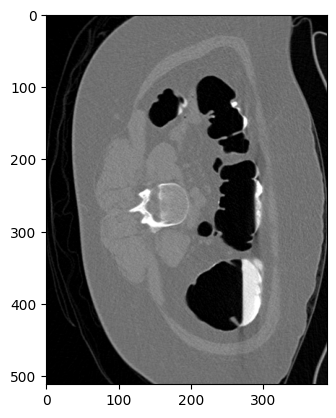

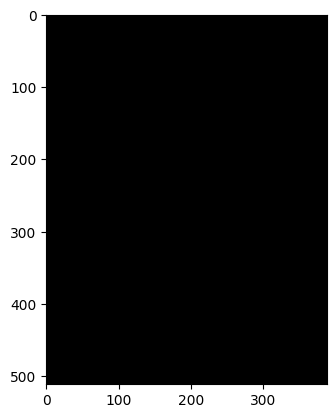

In [82]:
plt.imshow(im)
plt.show()
plt.imshow(lbc)
plt.show()

In [83]:
np.unique(lbc)

array([0], dtype=uint8)

In [15]:
import nibabel as nib

In [30]:
f = nib.load("/data2/onkar/atlasmini/BDMAP_00000181/ct.nii.gz").get_fdata()
data_normalized = (f - np.min(f)) / (np.max(f) - np.min(f))*255
data_normalized = data_normalized.astype("uint8")

In [31]:
f.shape

(512, 389, 537)

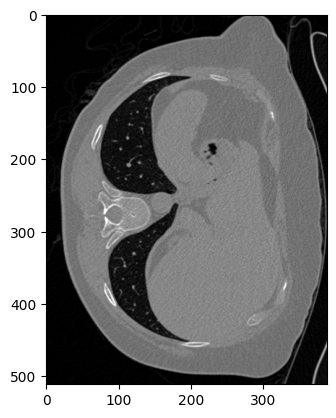

In [33]:
plt.imshow(data_normalized[:,:,492], cmap='gray')
plt.show()

In [85]:
d = os.listdir("/data2/onkar/atlasmini/BDMAP_00000181/segmentations")
label = np.concatenate([np.expand_dims(nib.load(f"/data2/onkar/atlasmini/BDMAP_00000181/segmentations/{k}").get_fdata().astype("uint8"), axis=3) for k in d], axis=3)

In [86]:
np.unique(label)

array([0, 1], dtype=uint8)

In [88]:
label = label.argmax(-1)

In [ ]:
label.shape

In [99]:
np.unique(label[:,:, 459])

array([0, 3, 4, 7, 8])

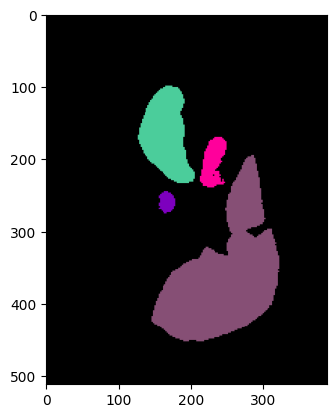

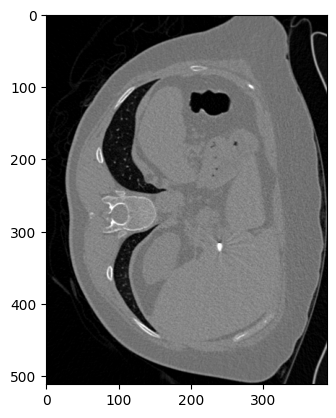

In [98]:
plt.imshow(onehot_to_rgb(label[:,:,459]))
plt.show()
plt.imshow(data_normalized[:,:,459],cmap='gray')
plt.show()

In [ ]:
"liver, postcava pancreas, spleen"